<a href="https://colab.research.google.com/github/MikeXL/brain/blob/master/iris_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu90/torch_nightly.html

Looking in links: https://download.pytorch.org/whl/nightly/cu90/torch_nightly.html


In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [12]:
print(torch.__version__)
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)

1.0.0.dev20181102
1.14.6
0.22.0
2.1.2


In [0]:
model = nn.Sequential(
  nn.Linear(3,12),
  nn.ReLU(),
  nn.Linear(12, 3), 
  nn.Softmax(1)
)

In [50]:
model

Sequential(
  (0): Linear(in_features=3, out_features=12, bias=True)
  (1): ReLU()
  (2): Linear(in_features=12, out_features=3, bias=True)
  (3): Softmax()
)

In [0]:
lf = nn.CrossEntropyLoss()


In [0]:
from sklearn import datasets
iris = datasets.load_iris()
wine = datasets.load_wine()

In [17]:
iris.target[0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [86]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

(array([ 1.,  3.,  7., 14., 43., 54., 31., 20.,  3.,  2.]),
 array([1.36 , 1.547, 1.734, 1.921, 2.108, 2.295, 2.482, 2.669, 2.856,
        3.043, 3.23 ]),
 <a list of 10 Patch objects>)

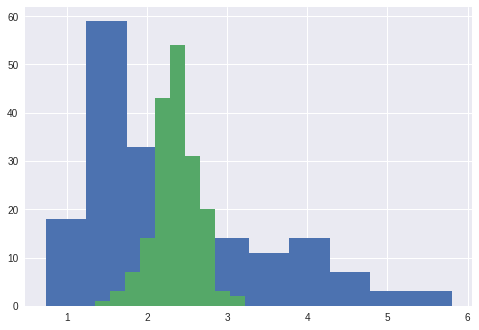

In [101]:
plt.hist(wine.data[:, 1])
plt.hist(wine.data[:, 2])

In [98]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

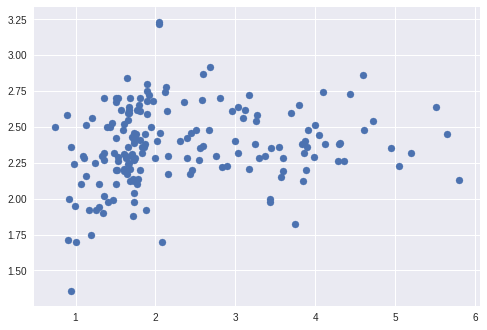

In [102]:
plt.scatter(wine.data[:, 1], wine.data[:, 2])

{'boxes': [<matplotlib.lines.Line2D at 0x7f817ff59e50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f817ff65690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f817ff72210>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f817ff65e10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8180400950>,
  <matplotlib.lines.Line2D at 0x7f817ff65290>]}

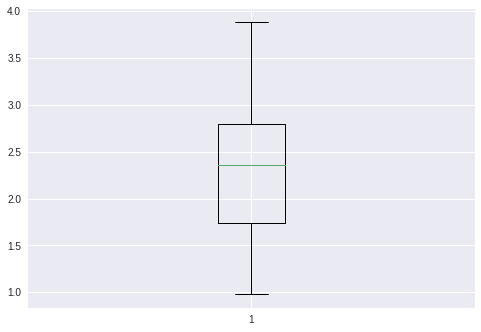

In [112]:
plt.boxplot(wine.data[:, 5], )

In [97]:
print(wine.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

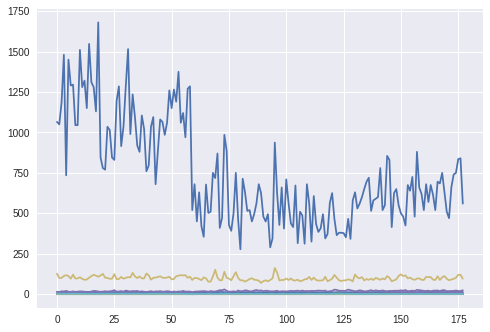

In [92]:
plt.plot(wine.data)

In [0]:
import sklearn
import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(wine.data, wine.target, test_size=.3)

In [0]:
def train_lbfgs(model, Y, X, optim, lf, epoch=200, lr=.01):
    loss = [0] * epoch
    optim = torch.optim.LBFGS(model.parameters(), lr=lr)
    for _ in range(epoch):
      def closure():
        yhat = model(X)
        optim.zero_grad()
        l = lf(yhat, Y)
        loss[_] = l.item()
        l.backward()
        return l
      optim.step(closure)
    return loss
  

def train(model, Y, X, optim, lf, epoch=200, lr=.1):
  loss = [0] * epoch
  for _ in range(epoch):
    yhat = model(X)
    optim.zero_grad()
    l = lf(yhat, Y)
    loss[_] = l.item()
    l.backward()
  return loss

      

In [0]:
model.zero_grad()
l = train_lbfgs(model, torch.from_numpy(iris.target).long(), torch.from_numpy(iris.data[:, 1:4]).float(), optim, lf, 500, .1)   

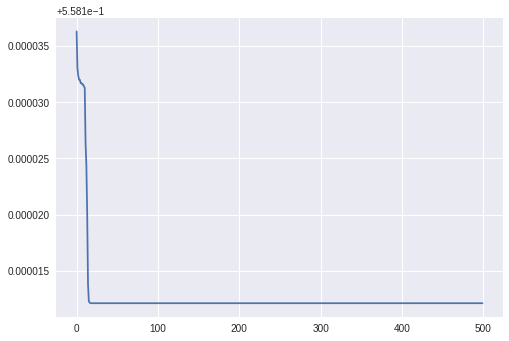

In [59]:
plt.plot(l)

In [0]:
optim = torch.optim.SGD(model.parameters(), lr=.1)
model.zero_grad()
l = train(model, torch.from_numpy(iris.target).long(), torch.from_numpy(iris.data[:, 0:3]).float(), optim, lf, 1000)   

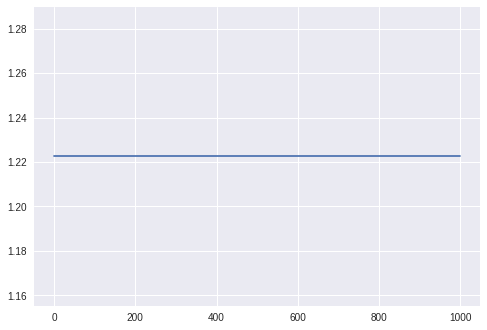

In [68]:
plt.plot(l)

In [70]:
with torch.no_grad():
  pred = model(torch.from_numpy(iris.data[:,0:3]).float())
  l = lf(pred, torch.from_numpy(iris.target).long())
  
l

tensor(1.2226)

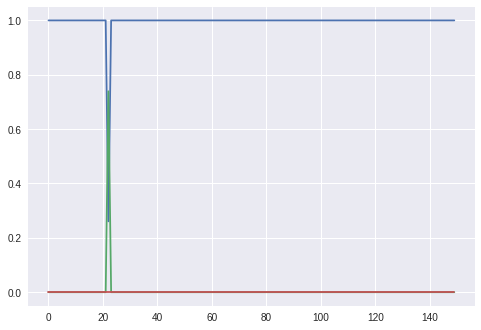

In [71]:
plt.plot(pred.data.numpy())

In [72]:
pred

tensor([[1.0000e+00, 7.0858e-39, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 5.1828e-36, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 3.9254e-31, 0.0000e+00],
        [1.0000e+00, 2.6765e-43, 0.0000e+00],
        [1.0000e+00, 3.0680e-28, 0.0000e+00],
        [1.0000e+00, 4.2039e-45, 0.0000e+00],
        [1.0000e+00, 1.4013e-45, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 2.3402e-43, 0.0000e+00],
        [1.0000e+00, 1.1351e-43, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 8.1334e-24, 0.0000e+00],
        [1.0000e+00, 1.2904e-27, 0.0000e+00],
        [1.0000e+00, 8.7227e-20, 0.0000e+00],
        [1.0000e+00, 1.0777e-24, 0.0000e+00],
        [1.0000e+00, 7.0858e-39, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.7359e-29, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 3.6254e-34, 0

In [0]:
out=model(torch.from_numpy(iris.data[:, 0:3]).float())
_, p = torch.max(out, 1)

In [79]:
p

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])

<generator object parameters at 0x7f8182a1d500>